<a href="https://colab.research.google.com/github/dung18520632/CS114.K21/blob/master/VGG_16.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **CÀI ĐẶT CÁC THƯ VIỆN**

In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import tensorflow as tf
import cv2
from PIL import Image
import os

# **CONNECTED MY KAGGLE**

In [2]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"hoangvandung","key":"536b985b25a4e735caa0dff6dcb92a3b"}'}

In [3]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

# **TẢI XUỐNG BỘ DATASET BIỂN BÁO**

In [4]:
!kaggle datasets download -d meowmeowmeowmeowmeow/gtsrb-german-traffic-sign --force

 99% 605M/612M [00:07<00:00, 95.1MB/s]
100% 612M/612M [00:07<00:00, 85.7MB/s]


# **GIẢI NÉN DATASET**

In [5]:
!unzip gtsrb-german-traffic-sign.zip

Le flux de sortie a été tronqué et ne contient que les 5000 dernières lignes.
  inflating: train/5/00005_00053_00011.png  
  inflating: train/5/00005_00053_00012.png  
  inflating: train/5/00005_00053_00013.png  
  inflating: train/5/00005_00053_00014.png  
  inflating: train/5/00005_00053_00015.png  
  inflating: train/5/00005_00053_00016.png  
  inflating: train/5/00005_00053_00017.png  
  inflating: train/5/00005_00053_00018.png  
  inflating: train/5/00005_00053_00019.png  
  inflating: train/5/00005_00053_00020.png  
  inflating: train/5/00005_00053_00021.png  
  inflating: train/5/00005_00053_00022.png  
  inflating: train/5/00005_00053_00023.png  
  inflating: train/5/00005_00053_00024.png  
  inflating: train/5/00005_00053_00025.png  
  inflating: train/5/00005_00053_00026.png  
  inflating: train/5/00005_00053_00027.png  
  inflating: train/5/00005_00053_00028.png  
  inflating: train/5/00005_00053_00029.png  
  inflating: train/5/00005_00054_00000.png  
  inflating: train/5/0

# **TẢI DỮ LIỆU IMAGE VÀ LABEL**

In [6]:
data=[]
labels=[]

for i in range(43) :
    path = "/content/Train/{0}/".format(i)
    Class=os.listdir(path)#Trả về các thư mục con từ đường dẫn đã cho
    print(path)
    for a in Class:
        try:
            image=cv2.imread(path+a)
            image_from_array = Image.fromarray(image, 'RGB')#Chuyển các bức ảnh thành xám
            size_image = image_from_array.resize((64, 64))# Các bức ảnh có các size khác nhau, ta thay đổi size của chúng về chung (64,64)
            data.append(np.array(size_image))#Thêm ảnh vào data dưới dạng ma trận
            labels.append(i)#Đánh số labels
        except AttributeError:
            print(" ")

/content/Train/0/
/content/Train/1/
/content/Train/2/
/content/Train/3/
/content/Train/4/
/content/Train/5/
/content/Train/6/
/content/Train/7/
/content/Train/8/
/content/Train/9/
/content/Train/10/
/content/Train/11/
/content/Train/12/
/content/Train/13/
/content/Train/14/
/content/Train/15/
/content/Train/16/
/content/Train/17/
/content/Train/18/
/content/Train/19/
/content/Train/20/
/content/Train/21/
/content/Train/22/
/content/Train/23/
/content/Train/24/
/content/Train/25/
/content/Train/26/
/content/Train/27/
/content/Train/28/
/content/Train/29/
/content/Train/30/
/content/Train/31/
/content/Train/32/
/content/Train/33/
/content/Train/34/
/content/Train/35/
/content/Train/36/
/content/Train/37/
/content/Train/38/
/content/Train/39/
/content/Train/40/
/content/Train/41/
/content/Train/42/


# **KÍCH THƯỚC DATA VÀ LABELS**

In [7]:
print(len(data))
print(len(labels))

39209
39209


# **CHUYỂN DỮ LIỆU THÀNH MA TRẬN** 

In [1]:
Cells=np.array(data)
labels=np.array(labels)
#Lưu ma trận 
np.save("Cells",Cells)
np.save("labels",labels)

NameError: ignored

In [3]:
#Load ma trận
Cells=np.load("Cells.npy")
labels=np.load("labels.npy")

# **TẠO RA BỘ DỮ LIỆU NGẪU NHIÊN**

In [4]:
s=np.arange(Cells.shape[0])
np.random.seed(43)
np.random.shuffle(s)
Cells=Cells[s]
labels=labels[s]

# **CHIA DỮ LIỆU THÀNH PHẦN TRAIN VÀ PHẦN TEST**

In [ ]:
(trainX,testX)=Cells[(int)(0.2*len(labels)):],Cells[:(int)(0.2*len(labels))]
trainX = trainX.astype('float32')/255 
testX = testX.astype('float32')/255
(trainY,testY)=Cells[(int)(0.2*len(labels)):],Cells[:(int)(0.2*len(labels))]
#Using one hote encoding for the train and validation labels
from keras.utils import to_categorical
trainY = to_categorical(trainY, 43)
testY = to_categorical(testY, 43)
print(len(trainX))
print(len(trainY))
print(len(testX))
print(testY)


Using TensorFlow backend.


In [49]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Input
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Sequential, Model, load_model
from tensorflow.keras import applications
from tensorflow.keras import optimizers
model = VGG16(weights="imagenet", include_top=False,
	input_tensor=Input(trainX.shape[1:]))
headModel = model.output
headModel = Flatten(name="flatten")(headModel)
headModel = Dense(1024, activation="relu")(headModel)
headModel = Dropout(0.5)(headModel)
headModel = Dense(43, activation="sigmoid")(headModel)
#nối VGG16 và head
model= Model(inputs=model.input, outputs=headModel)
opt = Adam(lr=1e-4)
model.compile(loss="binary_crossentropy", optimizer=opt,
	metrics=["accuracy"])

model.summary()


Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 64, 64, 3)]       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 64, 64, 64)        1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 64, 64, 64)        36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 32, 32, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 32, 32, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 32, 32, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 16, 16, 128)       0   

In [71]:
print("[INFO] training ...")
model.fit(trainX, trainY, validation_data=(testX, testY),
  batch_size=64, epochs=5, verbose=1)


[INFO] training ...
Epoch 1/5
491/491 [==============================] - 96s 195ms/step - loss: 5.0945e-04 - accuracy: 0.9975 - val_loss: 2.5638e-04 - val_accuracy: 0.9982
Epoch 2/5
491/491 [==============================] - 95s 194ms/step - loss: 5.9411e-04 - accuracy: 0.9972 - val_loss: 4.7287e-04 - val_accuracy: 0.9980
Epoch 3/5
491/491 [==============================] - 95s 194ms/step - loss: 8.2040e-04 - accuracy: 0.9960 - val_loss: 4.6232e-04 - val_accuracy: 0.9972
Epoch 4/5
491/491 [==============================] - 96s 195ms/step - loss: 2.8703e-04 - accuracy: 0.9988 - val_loss: 3.3109e-05 - val_accuracy: 0.9997
Epoch 5/5
491/491 [==============================] - 95s 194ms/step - loss: 3.0037e-04 - accuracy: 0.9988 - val_loss: 4.1848e-04 - val_accuracy: 0.9977


In [72]:
from tensorflow.keras.models import load_model

print("[INFO] save model...")
model.save('/content/vgg16.model')

[INFO] save model...
INFO:tensorflow:Assets written to: /content/vgg16.model/assets


In [73]:
from tensorflow.keras.models import load_model

print("[INFO] loading model...")
model = load_model('/content/vgg16.model')

[INFO] loading model...


In [74]:
#Predicting with the test data
import pandas as pd
y_test=pd.read_csv("/content/Test.csv")
y_test.head()
labels=y_test['Path'].to_numpy() 
y_test=y_test['ClassId'].values

data=[]

for f in labels:
    image_test=cv2.imread('/content/test/'+f.replace('Test/', ''))
    image_from_array_test = Image.fromarray(image_test, 'RGB')
    size_image = image_from_array_test.resize((64, 64))
    data.append(np.array(size_image))


In [75]:
X_test=np.array(data)
X_test = X_test.astype('float32')/255 
np.save("X_test",X_test)

In [76]:
print("Load x_test")
X_test=np.load("X_test.npy")

Load x_test


In [77]:
predictions = model.predict(X_test ,batch_size=64)
pred = predictions.argmax(axis=1)

In [93]:
labelNames = open("/content/signname.csv").read().strip().split("\n")[1:]
labelNames = [l.split(",")[1] for l in labelNames]

In [79]:
from sklearn.metrics import classification_report

print(classification_report(y_test,
  predictions.argmax(axis=1), target_names=labelNames))

                                                    precision    recall  f1-score   support

                              Speed limit (20km/h)       1.00      1.00      1.00        60
                              Speed limit (30km/h)       0.96      0.99      0.98       720
                              Speed limit (50km/h)       1.00      0.99      1.00       750
                              Speed limit (60km/h)       0.98      0.99      0.98       450
                              Speed limit (70km/h)       1.00      0.98      0.99       660
                              Speed limit (80km/h)       0.97      0.99      0.98       630
                       End of speed limit (80km/h)       1.00      0.91      0.95       150
                             Speed limit (100km/h)       0.99      0.99      0.99       450
                             Speed limit (120km/h)       1.00      0.99      0.99       450
                                        No passing       0.99      1.00      0.

In [80]:
from sklearn.metrics import accuracy_score

print(accuracy_score(y_test, pred))

0.9851148060174189


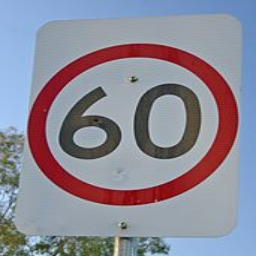

Yield


In [100]:
import cv2
from google.colab.patches import cv2_imshow
from skimage import exposure
from skimage import transform

image = cv2.imread('60.jpg')
cv2_imshow(cv2.resize((image),(256,256)))
image=transform.resize(image,(64,64))
image=exposure.equalize_adapthist(image,clip_limit=0.1)

test_data = np.array([image])
test_data = test_data.astype('float')/ 255.0
predict = model.predict(test_data)
print(labelNames[predict.argmax(axis=1)[0]])